In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt

### Read Data Excel

In [2]:
import time
# Memulai waktu komputasi
start_time = time.time()

jawaban_siswa_df = pd.read_excel('Data_Biologi.xlsx', sheet_name='jawaban') 
kunci_jawaban_df = pd.read_excel('Data_Biologi.xlsx', sheet_name='soal')
jawaban_siswa_df

,NISN,NAMA SISWA,jenis kelamin,J1,J2,J3,J4,J5,J6,J7,...,J12,J13,J14,J15,J16,J17,J18,J19,J20,NILAI
0,53414405,A. Rizal Sahputra,L,Caranya yaitu dengan menggunakan bio-indikator...,Vakuola = menyimpan cadangan makanan.,Mitokondria = menghasilkan energi dalam bentuk...,Lisosom : memasukkan makromolekul dari luar me...,Nukleus : tempat terjadinya replikasi untuk me...,Berfungsi untuk mengikat oksigen untuk diedark...,Depresi adalah gerakan otot yang menurunkan an...,...,"Yang pertama adalah suhu, kondisi suhu yang ti...",Terbentuklah sistem imunitas dari ibu hamil ya...,Faktor-faktor yang berpengaruh yaitu kemampuan...,Karena pernapasan pada paru-paru menyisakan ka...,Suatu teknologi yang memanfaatkan makanan makh...,karena bioteknologi juga dapat dimanfaatkan un...,Biji yang penyebarannya dibantu angin biasanya...,Karena biasanya tumbuhan yang masih muda lebih...,Karena batang tumbuhannya telah berada di dala...,68
1,65067320,Alivia Asyadi Nurfadilla,P,caranya = dengan bio-indikator untuk mengukur ...,Vakuola : menyimpan cadangan makanan.,Mitokondria : menghasilkan energi dalam bentuk...,Lisosom : pemasukan makromolekul dari luar men...,Nukleus : menyimpan informasi genetik.,Mengikat oksigen untuk diedarkan ke seluruh tu...,Depresi adalah gerakan otot yang menurunkan an...,...,"Faktor pertama adalah suhu, aktivitas enzim ak...",Karena secara otomatis antibodi dari wanita it...,Faktor-faktor yang mempengaruhi kelangsungan h...,Karena pernapasan pada paru-paru menyisakan ka...,Bioteknologi merupakan suatu teknologi yang me...,karena bioteknologi juga dapat dimanfaatkan un...,"Putik, berbunga",Karena lebih mudah untuk penyerbukannya.,Karena pada saat diberi sabut kelapa dan tanah...,57
2,67139187,Alvina Dwi Damayanti,P,caranya = dengan bio-indikator untuk mengukur ...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,Lisosom : tersusun enzim-enzim hidrolitik yang...,Nukleus : organel yang berfungsi untuk mengont...,Mengikat oksigen untuk diedarkan ke seluruh tu...,Depresi yaitu anggota tubuh pada manusia yang ...,...,Faktor pertama yang bisa mempengaruhi aktivita...,Karena adanya kelainan darah pada kehamilan ke...,"Berkembang biak, adaptasi, makan, lingkungan a...",Karena mengeluarkan sisa metabolisme tubuh ber...,Merupakan cabang ilmu yang menggunakan makhluk...,Membuat riset sebagai upaya apabila bahan baka...,"ringan dan punya sayap = contoh - dandelion, b...",Kultur jaringan : metode perbanyakan tumbuhan ...,Cangkok : mengelupas kulit suatu tanaman berka...,57
3,67787727,Anggun Putri Harwati,P,menunjukkan perairan tercemar atau tidak denga...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,NaN,"Nukleus : mengontrol aktivitas sel, mengatur g...",Membawa oksigen dari paru-paru ke seluruh jari...,Depresi: Depresi pada anggota tubuh manusia me...,...,"Faktor-faktor: derajat keasaman PH, suhu, zat-...",Karena Ibu janin memiliki rhesus atau golongan...,Faktor yang mempengaruhi adalah kemampuan bera...,Paru-paru juga mengeluarkan cairan metabolisme...,Bioteknologi adalah pemanfaatan makhluk hidup ...,Bioteknologi dapat menciptakan energi alternat...,"Ciri-cirinya adalah tanaman berukuran kecil, b...",Karena jika menggunakan yang masih muda memper...,"Karena batang tanaman berkayu dikelupas, kemud...",60
4,38921962,Annisa Kholifatur Rosida,P,cara untuk menentukan pencemaran ekosistem : d...,"Vakuola : menyimpan cadangan makanan, menyimpa...",Mitokondria : untuk respirasi aerob untuk meng...,"Lisosom : berperan dalam proses fagositosis, a...","Nukleus : menyimpan informasi genetik, tempat...",Hemoglobin berfungsi mengambil oksigen dari pa...,Depresi merupakan area atau bagian tubuh yang ...,...,"Yang pertama adalah suhu, suhu yang tinggi mem...",Karena Ibu dan janin memiliki rhesus atau golo...,"Kemampuan habituasi, seleksi alam, dan nilai p...",Karena paru-paru mengeluarkan sisa metabolisme...,Bioteknologi adalah sebuah teknologi yang meng...,Bioteknologi d

In [3]:
def preprocess(text):
    if not isinstance(text, str): #memastikan bahwa input yang diberikan berupa string
        return ''
    
    #case folding
    text = text.lower() #mengubah ke bentuk huruf kecil
    text = text.translate(str.maketrans('', '', string.punctuation)) #menghapus tanda baca
    text = re.sub(r'\d+', '', text) #menghapus angka
    
    #tokenization
    tokens = word_tokenize(text)
    
    #stopword removal 
    stopword_remover = StopWordRemoverFactory().get_stop_words()
    tokens = [word for word in tokens if word not in stopword_remover]
    
    #stemming
    stemmer = StemmerFactory().create_stemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

for col in range(1, 21):
    jawaban_siswa_df[f'preprocessed_J{col}'] = jawaban_siswa_df[f'J{col}'].apply(preprocess)
kunci_jawaban_df['preprocessed'] = kunci_jawaban_df['kunci jawaban'].apply(preprocess)

In [4]:
jawaban_siswa_df

,NISN,NAMA SISWA,jenis kelamin,J1,J2,J3,J4,J5,J6,J7,...,preprocessed_J11,preprocessed_J12,preprocessed_J13,preprocessed_J14,preprocessed_J15,preprocessed_J16,preprocessed_J17,preprocessed_J18,preprocessed_J19,preprocessed_J20
0,53414405,A. Rizal Sahputra,L,Caranya yaitu dengan menggunakan bio-indikator...,Vakuola = menyimpan cadangan makanan.,Mitokondria = menghasilkan energi dalam bentuk...,Lisosom : memasukkan makromolekul dari luar me...,Nukleus : tempat terjadinya replikasi untuk me...,Berfungsi untuk mengikat oksigen untuk diedark...,Depresi adalah gerakan otot yang menurunkan an...,...,nutrisi rupa bahan baku sumber energi proses m...,pertama suhu kondisi suhu tinggi buat cepat mo...,bentuk sistem imunitas ibu hamil serang sel da...,faktorfaktor pengaruh mampu adaptasi seleksi a...,napas paruparu sisa karbondioksida masuk zat s...,suatu teknologi manfaat makan makhluk hidup ha...,bioteknologi manfaat hasil energi sifat baru b...,biji sebar bantu angin biasa bentuk lebih keci...,biasa tumbuh muda lebih gampang jadi kultur ja...,batang tumbuh ada tanah jadi jaring ada tumbuh...
1,65067320,Alivia Asyadi Nurfadilla,P,caranya = dengan bio-indikator untuk mengukur ...,Vakuola : menyimpan cadangan makanan.,Mitokondria : menghasilkan energi dalam bentuk...,Lisosom : pemasukan makromolekul dari luar men...,Nukleus : menyimpan informasi genetik.,Mengikat oksigen untuk diedarkan ke seluruh tu...,Depresi adalah gerakan otot yang menurunkan an...,...,nutrisi rupa bahan baku sumber energi proses m...,faktor pertama suhu aktivitas enzim makin ting...,otomatis antibodi wanita serang sel darah mera...,faktorfaktor pengaruh langsung hidup suatu mak...,napas paruparu sisa karbondioksida masuk zat s...,bioteknologi rupa suatu teknologi manfaat makh...,bioteknologi manfaat hasil energi meski jumlah...,putik bunga,lebih mudah serbu,beri sabut kelapa tanah batang tumbuh akar
2,67139187,Alvina Dwi Damayanti,P,caranya = dengan bio-indikator untuk mengukur ...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,Lisosom : tersusun enzim-enzim hidrolitik yang...,Nukleus : organel yang berfungsi untuk mengont...,Mengikat oksigen untuk diedarkan ke seluruh tu...,Depresi yaitu anggota tubuh pada manusia yang ...,...,nutrisi rupa bahan baku sumber energi proses m...,faktor pertama pengaruh aktivitas enzim suhu t...,ada lain darah hamil dua sebab ada rhesus ibu ...,kembang biak adaptasi makan lingkung habitat,keluar sisa metabolisme tubuh upa karbondioksi...,rupa cabang ilmu guna makhluk hidup,buat riset upaya apabila bahan bakar minyak se...,ringan punya sayap contoh dandelion biasa tumb...,kultur jaring metode banyak tumbuh lalu ambil ...,cangkok kelupas kulit suatu tanam kayu lalu bu...
3,67787727,Anggun Putri Harwati,P,menunjukkan perairan tercemar atau tidak denga...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,NaN,"Nukleus : mengontrol aktivitas sel, mengatur g...",Membawa oksigen dari paru-paru ke seluruh jari...,Depresi: Depresi pada anggota tubuh manusia me...,...,faktor luar pengaruh tumbuh maksud faktor gen ...,faktorfaktor derajat asam ph suhu zatzat hamba...,ibu janin milik rhesus golong darah beda skema...,faktor pengaruh mampu adaptasi seleksi alam ti...,paruparu keluar cair metabolisme karbon dioksi...,bioteknologi manfaat makhluk hidup buat suatu ...,bioteknologi cipta energi alternatif manfaat m...,ciricirinya tanam ukur kecil sifat ringan,guna muda banyak tanam tumbuh,batang tanam kayu kelupas kemudian balut tanah...
4,38921962,Annisa Kholifatur Rosida,P,cara untuk menentukan pencemaran ekosistem : d...,"Vakuola : menyimpan cadangan makanan, menyimpa...",Mitokondria : untuk respirasi aerob untuk meng...,"Lisosom : berperan dalam proses fagositosis, a...","Nukleus : menyimpan informasi genetik, tempat...",Hemoglobin berfungsi mengambil oksigen dari pa...,Depresi merupakan area atau bagian tubuh yang ...,...,nutrisi rupa bahan baku sumber energi cahaya m...

In [5]:
kunci_jawaban_df

,soal,kunci jawaban,preprocessed
0,1,Planaria hanya dapat hidup di perairan bersih ...,planaria hidup air bersih cemar planaria dapat...
1,2,Fungsi utama dari vakuola adalah sebagai osmor...,fungsi utama vakuola osmoregulator jaga nilai ...
2,3,sebagai pabrik (yang memproduksi) energi sel y...,pabrik produksi energi sel hasil energi bentuk...
3,4,"Lisosom berfungsi untuk mencerna senyawa, sepe...",lisosom fungsi cerna senyawa karbohidrat prote...
4,5,Nukleus berfungsi untuk menampung materi genet...,nukleus fungsi tampung materi genetik makhluk ...
5,6,Hemoglobin berfungsi mengikat oksigen untuk di...,hemoglobin fungsi ikat oksigen edar seluruh tu...
6,7,Depresi berarti gerak otot yang menurunkan ang...,depresi arti gerak otot turun anggota tubuh ba...
7,8,Supinasi adalah gerakan otot untuk memutar len...,supinasi gera otot putar lengan kaki telapak t...
8,9,Fleksi adalah gerakan mengurangi sudut antara ...,fleksi gera kurang sudut tulang ekstensi gerak...
9,10,Abduksi adalah gerakan menjauh dari titik teng...,abduksi gera jauh titik tengah tubuh adduksi g...


### Tanpa Menggunakan Query Expansion

In [6]:
# Menghitung tf-idf
def tfidf(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X

for col in range(1, 21):
        jawaban_siswa_col = jawaban_siswa_df[f'preprocessed_J{col}']
        tfidf_matrix_siswa = tfidf(jawaban_siswa_col)
tfidf_matrix_kunci = tfidf(kunci_jawaban_df['preprocessed'])
print (tfidf_matrix_kunci)

  (0, 196)	0.15454536513913417
  (0, 155)	0.15454536513913417
  (0, 195)	0.15454536513913417
  (0, 94)	0.1358477415143805
  (0, 219)	0.10388394280642436
  (0, 209)	0.0906177677232219
  (0, 180)	0.1358477415143805
  (0, 62)	0.1358477415143805
  (0, 117)	0.12258156643117805
  (0, 109)	0.15454536513913417
  (0, 74)	0.15454536513913417
  (0, 116)	0.1358477415143805
  (0, 170)	0.15454536513913417
  (0, 118)	0.15454536513913417
  (0, 114)	0.15454536513913417
  (0, 147)	0.15454536513913417
  (0, 220)	0.15454536513913417
  (0, 135)	0.1358477415143805
  (0, 126)	0.12258156643117805
  (0, 56)	0.1358477415143805
  (0, 52)	0.30909073027826833
  (0, 38)	0.30909073027826833
  (0, 3)	0.36774469929353415
  (0, 88)	0.2451631328623561
  (0, 157)	0.4636360954174025
  :	:
  (19, 5)	0.11850749158180485
  (19, 9)	0.11850749158180485
  (19, 173)	0.11850749158180485
  (19, 16)	0.11850749158180485
  (19, 77)	0.2370149831636097
  (19, 101)	0.11850749158180485
  (19, 51)	0.11850749158180485
  (19, 89)	0.11850749

In [7]:
# Menghitung dice similarity
def dice_similarity(str1, str2):
    # tokenization
    str1_tokens = set(word_tokenize(str1))
    str2_tokens = set(word_tokenize(str2))
    
    # similarity calculation
    intersection = len(str1_tokens.intersection(str2_tokens))
    dice_sim = 2 * intersection / (len(str1_tokens) + len(str2_tokens))
    
    return dice_sim

In [8]:
similarity_scores = []
for col in range(1, 21):
    jawaban_siswa_col = jawaban_siswa_df[f'preprocessed_J{col}']
    col_similarity_scores = []
    for i, jawaban_siswa in enumerate(jawaban_siswa_col):
        dice_scores = []
        for j, kunci_jawaban in enumerate(kunci_jawaban_df['preprocessed']):
            dice_scores.append(dice_similarity(jawaban_siswa, kunci_jawaban))
        col_similarity_scores.append(max(dice_scores))
    
    similarity_scores.append(col_similarity_scores)

similarity_scores_menggunakan_df = pd.DataFrame(similarity_scores).transpose()
similarity_scores_menggunakan_df.columns = [f'similarity_score_J{col}' for col in range(1, 21)]

In [9]:
def calculate_numeric_grade(similarity_score):
    x = similarity_score
    if x >= 0 and x <= 0.05:
      return 5
    elif x >= 0.05 and x <= 0.1:
      return 10
    elif x >= 0.1 and x <= 0.15:
      return 15
    elif x >= 0.15 and x <= 0.2:
      return 20
    elif x >= 0.2 and x <= 0.25:
      return 25
    elif x >= 0.25 and x <= 0.3:
      return 30
    elif x >= 0.3 and x <= 0.35:
      return 35
    elif x >= 0.35 and x <= 0.4:
      return 40
    elif x >= 0.4 and x <= 0.45:
      return 45
    elif x >= 0.45 and x <= 0.5:
      return 50
    elif x >= 0.5 and x <= 0.55:
      return 55
    elif x >= 0.55 and x <= 0.6:
      return 60
    elif x >= 0.6 and x <= 0.65:
      return 65
    elif x >= 0.65 and x <= 0.7:
      return 70
    elif x >= 0.7 and x <= 0.75:
      return 75
    elif x >= 0.75 and x <= 0.8:
      return 8
    elif x >= 0.8 and x <= 0.85:
      return 85
    elif x >= 0.85 and x <= 0.9:
      return 9
    elif x >= 0.9 and x <= 0.95:
      return 95
    elif x >= 0.95 and x <= 1:
      return 100

for col in range(1, 21):
    col_name = f'preprocessed_J{col}'
    jawaban_siswa_df[f'similarity_J{col}'] = jawaban_siswa_df[col_name].apply(
        lambda x: dice_similarity(x, kunci_jawaban_df.loc[col-1, 'preprocessed']))
    jawaban_siswa_df[f'score_J{col}'] = jawaban_siswa_df[f'similarity_J{col}'].apply(calculate_numeric_grade)

In [10]:
jawaban_siswa_df

,NISN,NAMA SISWA,jenis kelamin,J1,J2,J3,J4,J5,J6,J7,...,similarity_J16,score_J16,similarity_J17,score_J17,similarity_J18,score_J18,similarity_J19,score_J19,similarity_J20,score_J20
0,53414405,A. Rizal Sahputra,L,Caranya yaitu dengan menggunakan bio-indikator...,Vakuola = menyimpan cadangan makanan.,Mitokondria = menghasilkan energi dalam bentuk...,Lisosom : memasukkan makromolekul dari luar me...,Nukleus : tempat terjadinya replikasi untuk me...,Berfungsi untuk mengikat oksigen untuk diedark...,Depresi adalah gerakan otot yang menurunkan an...,...,0.363636,40,0.480000,50,0.416667,45,0.300000,30,0.162162,20
1,65067320,Alivia Asyadi Nurfadilla,P,caranya = dengan bio-indikator untuk mengukur ...,Vakuola : menyimpan cadangan makanan.,Mitokondria : menghasilkan energi dalam bentuk...,Lisosom : pemasukan makromolekul dari luar men...,Nukleus : menyimpan informasi genetik.,Mengikat oksigen untuk diedarkan ke seluruh tu...,Depresi adalah gerakan otot yang menurunkan an...,...,0.434783,45,0.428571,45,0.000000,5,0.133333,15,0.166667,20
2,67139187,Alvina Dwi Damayanti,P,caranya = dengan bio-indikator untuk mengukur ...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,Lisosom : tersusun enzim-enzim hidrolitik yang...,Nukleus : organel yang berfungsi untuk mengont...,Mengikat oksigen untuk diedarkan ke seluruh tu...,Depresi yaitu anggota tubuh pada manusia yang ...,...,0.210526,25,0.181818,20,0.160000,20,0.148148,15,0.208333,25
3,67787727,Anggun Putri Harwati,P,menunjukkan perairan tercemar atau tidak denga...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,NaN,"Nukleus : mengontrol aktivitas sel, mengatur g...",Membawa oksigen dari paru-paru ke seluruh jari...,Depresi: Depresi pada anggota tubuh manusia me...,...,0.500000,50,1.000000,100,0.300000,30,0.117647,15,0.238095,25
4,38921962,Annisa Kholifatur Rosida,P,cara untuk menentukan pencemaran ekosistem : d...,"Vakuola : menyimpan cadangan makanan, menyimpa...",Mitokondria : untuk respirasi aerob untuk meng...,"Lisosom : berperan dalam proses fagositosis, a...","Nukleus : menyimpan informasi genetik, tempat...",Hemoglobin berfungsi mengambil oksigen dari pa...,Depresi merupakan area atau bagian tubuh yang ...,...,0.545455,55,0.352941,40,0.480000,50,0.190476,20,0.352941,40
5,67692368,Arien Kusuma Ningrum,P,caranya : dengan bio-indikator untuk mengukur ...,"Vakuola : menyimpan cadangan makanan, membangu...",Mitokondria : menghasilkan energi dalam bentuk...,Lisosom : pemasukan makromolekul dari luar men...,"Nukleus : tempat terjadinya replikasi, menjaga...","Mengikat karbondioksida untuk dikeluarkan, men...",Depresi adalah anggota tubuh manusia yang menu...,...,0.400000,40,0.833333,85,0.240000,25,0.060606,10,0.300000,30
6,73613816,Arvina Dwi Anggraini,P,Planaria dapat berperan sebagai salah satu ind...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : respirasi aerob.,Lisosom : tersusun enzim-enzim hidrolitik yang...,"Nukleus : mengontrol aktivitas sel, mengatur g...",hemoglobin berfungsi membawa oksigen dari paru...,"Depresi = kebawah, elevasi = keatas.",...,0.200000,20,1.000000,100,0.962963,100,1.000000,100,0.877193,9
7,69769179,Avista Farihatul Maulidina,P,Planaria dapat berperan sebagai salah satu bio...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,Lisosom : tersusun enzim-enzim hidrolitik yang...,"Nukleus : mengontrol aktivitas sel, mengatur g...",Fungsi hemoglobin itu mengikat oksigen untuk d...,Depresi yaitu anggota tubuh pada manusia yang ...,...,0.526316,55,0.272727,30,0.090909,10,0.133333,15,0.181818,20
8,56005232,Bambang Rizky Artomo,L,NaN,"Vakuola : menyimpan cadangan makanan, menyimpa...",Mitokondria : untuk respirasi aerob.,Lisosom : berperan dalam proses pencernaan.,NaN,Hemoglobin berfungsi mengedarkan oksigen ke se...,"Depresi = kebawah, elevasi = keatas.",...,0.600000,60,0.800000,8,0.500000,50,0.190476,20,0.410256,45
9,61661493,Dea April

In [11]:
similarity_scores_menggunakan_df['total_similarity'] = similarity_scores_menggunakan_df.iloc[:, 0:20].sum(axis=1)
similarity_scores_menggunakan_df['average_similarity'] = similarity_scores_menggunakan_df['total_similarity'] / 20
similarity_scores_menggunakan_df

,similarity_score_J1,similarity_score_J2,similarity_score_J3,similarity_score_J4,similarity_score_J5,similarity_score_J6,similarity_score_J7,similarity_score_J8,similarity_score_J9,similarity_score_J10,...,similarity_score_J13,similarity_score_J14,similarity_score_J15,similarity_score_J16,similarity_score_J17,similarity_score_J18,similarity_score_J19,similarity_score_J20,total_similarity,average_similarity
0,0.129032,0.214286,0.588235,0.111111,0.129032,0.869565,0.666667,0.235294,0.153846,0.097561,...,0.421053,0.818182,0.545455,0.363636,0.480000,0.416667,0.300000,0.162162,7.392693,0.369635
1,0.133333,0.214286,0.588235,0.111111,0.307692,0.857143,0.666667,0.235294,0.153846,0.173913,...,0.378378,0.923077,0.545455,0.434783,0.428571,0.000000,0.133333,0.166667,7.092028,0.354601
2,0.133333,0.424242,0.153846,0.315789,0.285714,0.588235,0.476190,0.235294,0.095238,0.097561,...,0.228571,0.315789,0.714286,0.266667,0.181818,0.160000,0.148148,0.208333,5.879058,0.293953
3,0.238095,0.424242,0.153846,0.000000,0.230769,0.545455,0.333333,0.235294,0.111111,0.122449,...,0.500000,0.727273,0.608696,0.500000,1.000000,0.300000,0.117647,0.238095,7.286306,0.364315
4,0.066667,0.400000,0.400000,0.500000,0.222222,0.476190,0.272727,0.235294,0.142857,0.071429,...,0.512821,0.315789,0.720000,0.545455,0.352941,0.480000,0.190476,0.352941,6.959733,0.347987
5,0.133333,0.424242,0.588235,0.300000,0.292683,0.500000,0.588235,0.235294,0.080000,0.125000,...,0.322581,0.571429,0.500000,0.400000,0.833333,0.240000,0.166667,0.300000,7.516247,0.375812
6,0.250000,0.378378,0.153846,0.235294,0.275862,0.434783,0.285714,0.235294,0.142857,0.125000,...,0.512821,0.720000,0.608696,0.250000,1.000000,0.962963,1.000000,0.877193,9.395130,0.469756
7,0.205128,0.424242,0.153846,0.315789,0.125000,0.869565,0.555556,0.235294,0.090909,0.071429,...,0.358974,0.880000,0.571429,0.526316,0.272727,0.111111,0.153846,0.181818,7.269647,0.363482
8,0.000000,0.333333,0.153846,0.307692,0.000000,0.555556,0.285714,0.235294,0.418605,0.125000,...,0.378378,0.846154,0.695652,0.600000,0.800000,0.500000,0.190476,0.410256,8.002624,0.400131
9,0.066667,0.378378,0.153846,0.250000,0.275862,0.700000,0.272727,0.235294,0.086957,0.100000,...,0.500000,0.545455,0.666667,0.521739,1.000000,0.444444,0.111111,0.311111,7.314703,0.365735


In [12]:
jawaban_siswa_df['similarity_score'] = similarity_scores_menggunakan_df['average_similarity']
jawaban_siswa_df['score'] = jawaban_siswa_df['similarity_score'].apply(calculate_numeric_grade)
jawaban_siswa_df[['NISN', 'NAMA SISWA', 'jenis kelamin', 'NILAI', 'similarity_score', 'score']]

,NISN,NAMA SISWA,jenis kelamin,NILAI,similarity_score,score
0,53414405,A. Rizal Sahputra,L,68,0.369635,40
1,65067320,Alivia Asyadi Nurfadilla,P,57,0.354601,40
2,67139187,Alvina Dwi Damayanti,P,57,0.293953,30
3,67787727,Anggun Putri Harwati,P,60,0.364315,40
4,38921962,Annisa Kholifatur Rosida,P,68,0.347987,35
5,67692368,Arien Kusuma Ningrum,P,65,0.375812,40
6,73613816,Arvina Dwi Anggraini,P,65,0.469756,50
7,69769179,Avista Farihatul Maulidina,P,50,0.363482,40
8,56005232,Bambang Rizky Artomo,L,55,0.400131,45
9,61661493,Dea Aprillia Pratiwi,P,52,0.365735,40


In [13]:
import math

nilai_siswa = jawaban_siswa_df['score']
nilai_asli = jawaban_siswa_df['NILAI']
jumlah_siswa = len(jawaban_siswa_df)
nilai_maksimal = 100

error = 0
for i in range(jumlah_siswa):
    error += (nilai_siswa[i] - nilai_asli[i]) ** 2
error_rate = math.sqrt(error / jumlah_siswa) / nilai_maksimal
accurate = 1-error_rate
percent = accurate*100

print("Error rate:", error_rate)
print(f"Akurasi : {percent:.2f}%")

Error rate: 0.19317522270381018
Akurasi : 80.68%


In [14]:
end_time = time.time()

# Menghitung durasi waktu komputasi
duration = end_time - start_time

# Menampilkan durasi waktu komputasi
print(f"Waktu komputasi: {duration} detik")

Waktu komputasi: 324.4384398460388 detik


### Menggunakan Query Expansion

In [15]:
import time
# Memulai waktu komputasi
start_time = time.time()

jawaban_siswa_df2 = pd.read_excel('Data_Biologi.xlsx', sheet_name='jawaban') 
kunci_jawaban_df2 = pd.read_excel('Data_Biologi.xlsx', sheet_name='soal')
kunci_jawaban_df3 = pd.read_excel('Data_Biologi.xlsx', sheet_name='soal')

In [16]:
for col in range(1, 21):
    jawaban_siswa_df2[f'prePro_J{col}'] = jawaban_siswa_df2[f'J{col}'].apply(preprocess)
kunci_jawaban_df2['prePro'] = kunci_jawaban_df2['kunci jawaban'].apply(preprocess)

In [17]:
jawaban_siswa_df2

,NISN,NAMA SISWA,jenis kelamin,J1,J2,J3,J4,J5,J6,J7,...,prePro_J11,prePro_J12,prePro_J13,prePro_J14,prePro_J15,prePro_J16,prePro_J17,prePro_J18,prePro_J19,prePro_J20
0,53414405,A. Rizal Sahputra,L,Caranya yaitu dengan menggunakan bio-indikator...,Vakuola = menyimpan cadangan makanan.,Mitokondria = menghasilkan energi dalam bentuk...,Lisosom : memasukkan makromolekul dari luar me...,Nukleus : tempat terjadinya replikasi untuk me...,Berfungsi untuk mengikat oksigen untuk diedark...,Depresi adalah gerakan otot yang menurunkan an...,...,nutrisi rupa bahan baku sumber energi proses m...,pertama suhu kondisi suhu tinggi buat cepat mo...,bentuk sistem imunitas ibu hamil serang sel da...,faktorfaktor pengaruh mampu adaptasi seleksi a...,napas paruparu sisa karbondioksida masuk zat s...,suatu teknologi manfaat makan makhluk hidup ha...,bioteknologi manfaat hasil energi sifat baru b...,biji sebar bantu angin biasa bentuk lebih keci...,biasa tumbuh muda lebih gampang jadi kultur ja...,batang tumbuh ada tanah jadi jaring ada tumbuh...
1,65067320,Alivia Asyadi Nurfadilla,P,caranya = dengan bio-indikator untuk mengukur ...,Vakuola : menyimpan cadangan makanan.,Mitokondria : menghasilkan energi dalam bentuk...,Lisosom : pemasukan makromolekul dari luar men...,Nukleus : menyimpan informasi genetik.,Mengikat oksigen untuk diedarkan ke seluruh tu...,Depresi adalah gerakan otot yang menurunkan an...,...,nutrisi rupa bahan baku sumber energi proses m...,faktor pertama suhu aktivitas enzim makin ting...,otomatis antibodi wanita serang sel darah mera...,faktorfaktor pengaruh langsung hidup suatu mak...,napas paruparu sisa karbondioksida masuk zat s...,bioteknologi rupa suatu teknologi manfaat makh...,bioteknologi manfaat hasil energi meski jumlah...,putik bunga,lebih mudah serbu,beri sabut kelapa tanah batang tumbuh akar
2,67139187,Alvina Dwi Damayanti,P,caranya = dengan bio-indikator untuk mengukur ...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,Lisosom : tersusun enzim-enzim hidrolitik yang...,Nukleus : organel yang berfungsi untuk mengont...,Mengikat oksigen untuk diedarkan ke seluruh tu...,Depresi yaitu anggota tubuh pada manusia yang ...,...,nutrisi rupa bahan baku sumber energi proses m...,faktor pertama pengaruh aktivitas enzim suhu t...,ada lain darah hamil dua sebab ada rhesus ibu ...,kembang biak adaptasi makan lingkung habitat,keluar sisa metabolisme tubuh upa karbondioksi...,rupa cabang ilmu guna makhluk hidup,buat riset upaya apabila bahan bakar minyak se...,ringan punya sayap contoh dandelion biasa tumb...,kultur jaring metode banyak tumbuh lalu ambil ...,cangkok kelupas kulit suatu tanam kayu lalu bu...
3,67787727,Anggun Putri Harwati,P,menunjukkan perairan tercemar atau tidak denga...,"Vakuola : membangun turgor sel, menyimpan cada...",Mitokondria : untuk respirasi aerob.,NaN,"Nukleus : mengontrol aktivitas sel, mengatur g...",Membawa oksigen dari paru-paru ke seluruh jari...,Depresi: Depresi pada anggota tubuh manusia me...,...,faktor luar pengaruh tumbuh maksud faktor gen ...,faktorfaktor derajat asam ph suhu zatzat hamba...,ibu janin milik rhesus golong darah beda skema...,faktor pengaruh mampu adaptasi seleksi alam ti...,paruparu keluar cair metabolisme karbon dioksi...,bioteknologi manfaat makhluk hidup buat suatu ...,bioteknologi cipta energi alternatif manfaat m...,ciricirinya tanam ukur kecil sifat ringan,guna muda banyak tanam tumbuh,batang tanam kayu kelupas kemudian balut tanah...
4,38921962,Annisa Kholifatur Rosida,P,cara untuk menentukan pencemaran ekosistem : d...,"Vakuola : menyimpan cadangan makanan, menyimpa...",Mitokondria : untuk respirasi aerob untuk meng...,"Lisosom : berperan dalam proses fagositosis, a...","Nukleus : menyimpan informasi genetik, tempat...",Hemoglobin berfungsi mengambil oksigen dari pa...,Depresi merupakan area atau bagian tubuh yang ...,...,nutrisi rupa bahan baku sumber energi cahaya m...,pertama suhu suhu tinggi buat cepat molekul su...,ibu janin

In [18]:
def load(filename):
    with open(filename) as data_file:
        data = json.load(data_file)
    return data

mydict = load('dictIPA.json')

def get_synonyms(word):
    if word in mydict.keys():
        return mydict[word]['sinonim']
    else:
        return []

def query_expansion(kunci_jawaban, jawaban_siswa):
    expanded_kunci_jawaban = []
    kunci_jawaban = nltk.word_tokenize(kunci_jawaban)
    jawaban_siswa = nltk.word_tokenize(jawaban_siswa)
    for kunci in kunci_jawaban:
        sinonim = get_synonyms(kunci)
        found = False
        for sin in sinonim:
            if sin in jawaban_siswa:
                expanded_kunci_jawaban.append(sin)       
                found = True
                break
        if not found:
            expanded_kunci_jawaban.append(kunci)
    return expanded_kunci_jawaban

In [19]:
dataNew = pd.DataFrame(columns=['No', 'Siswa', 'KunciJawaban','PreJawabanSiswa','expended'])
dataNew

,No,Siswa,KunciJawaban,PreJawabanSiswa,expended


In [20]:
kunci_jawaban_qe2 = kunci_jawaban_df2['prePro']
kunci_jawaban_qe3 = kunci_jawaban_df3['kunci jawaban']
nama_siswa=jawaban_siswa_df2['NAMA SISWA']
i=0
j=0
for col in range(0,36):
  for row in range(0,20):
    jawaban_siswa_qe2 = jawaban_siswa_df2[f'prePro_J{row+1}']
    expended =' '.join(query_expansion(kunci_jawaban_qe2[row], jawaban_siswa_qe2[col]))
    dataNew.loc[j]=[j+1,nama_siswa[col],kunci_jawaban_qe3[row],jawaban_siswa_qe2[col],expended]
    j+=1
dataNew

,No,Siswa,KunciJawaban,PreJawabanSiswa,expended
0,1,A. Rizal Sahputra,Planaria hanya dapat hidup di perairan bersih ...,cara guna bioindikator ukur cemar air,planaria hidup air bersih cemar planaria dapat...
1,2,A. Rizal Sahputra,Fungsi utama dari vakuola adalah sebagai osmor...,vakuola simpan cadang makan,fungsi utama vakuola osmoregulator jaga nilai ...
2,3,A. Rizal Sahputra,sebagai pabrik (yang memproduksi) energi sel y...,mitokondria hasil energi bentuk atp respirasi ...,pabrik produksi energi sel hasil energi bentuk...
3,4,A. Rizal Sahputra,"Lisosom berfungsi untuk mencerna senyawa, sepe...",lisosom masuk makromolekul luar tuju dalam sel...,lisosom fungsi cerna makromolekul karbohidrat ...
4,5,A. Rizal Sahputra,Nukleus berfungsi untuk menampung materi genet...,nukleus tempat jadi replikasi jaga integritas ...,nukleus fungsi tampung materi gen makhluk hidu...
...,...,...,...,...,...
715,716,Widya Artika Sari Dewi,Bioteknologi adalah suatu ilmu biologi yang me...,bioteknologi manfaat makhluk hidup hasil baran...,bioteknologi suatu ilmu biologi manfaat organi...
716,717,Widya Artika Sari Dewi,Bioteknologi dapat menciptakan energi alternat...,bioteknologi cipta energi alternatif manfaat m...,bioteknologi cipta energi alternatif manfaat m...
717,718,Widya Artika Sari Dewi,Biji yang persebarannya dibantu oleh angin mem...,ringan punya sayap contoh dandelion biasa tumb...,biji sebar bantu angin milik ciri ukur kecil r...
718,719,Widya Artika Sari Dewi,Karena sel-sel pada jaringan muda memiliki kem...,kultur jaring metode banyak tumbuh lalu ambil ...,selsel jaring muda milik mampu belah sifat tot...


In [21]:
def tfidf(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X

tfidf_matrix_kunci = tfidf(dataNew['expended'])
tfidf_matrix_siswa = tfidf(dataNew['PreJawabanSiswa'])
print (tfidf_matrix_kunci)

  (0, 224)	0.15677396489231613
  (0, 174)	0.15677396489231613
  (0, 223)	0.16250755625210164
  (0, 108)	0.12993721397104083
  (0, 251)	0.09473665285173576
  (0, 239)	0.08393398782928001
  (0, 206)	0.12993721397104083
  (0, 72)	0.12993721397104083
  (0, 134)	0.11410515251604099
  (0, 125)	0.15572077082774383
  (0, 84)	0.15677396489231613
  (0, 133)	0.13048194587470718
  (0, 193)	0.15677396489231613
  (0, 135)	0.15677396489231613
  (0, 131)	0.14410053701299086
  (0, 166)	0.15677396489231613
  (0, 252)	0.15677396489231613
  (0, 153)	0.12993721397104083
  (0, 143)	0.11410515251604099
  (0, 66)	0.13216272876074642
  (0, 62)	0.31354792978463225
  (0, 47)	0.32752277943257674
  (0, 3)	0.36767091330196294
  (0, 102)	0.22466778872551502
  (0, 178)	0.47032189467694835
  :	:
  (719, 242)	0.1161871923542464
  (719, 10)	0.11953579461807627
  (719, 198)	0.1161871923542464
  (719, 18)	0.1161871923542464
  (719, 87)	0.2323743847084928
  (719, 116)	0.1161871923542464
  (719, 61)	0.1161871923542464
  (71

In [22]:
#menghitung nilai similarity
def dice_similarity(str1, str2):
    # tokenization
    str1_tokens = set(word_tokenize(str1))
    str2_tokens = set(word_tokenize(str2))
    
    # similarity calculation
    intersection = len(str1_tokens.intersection(str2_tokens))
    dice_sim = 2 * intersection / (len(str1_tokens) + len(str2_tokens))
    
    return dice_sim

In [23]:
similarity_scores = []
for i, jawaban_siswa in enumerate(dataNew['PreJawabanSiswa']):
    dice_scores = []
    for j, kunci_jawaban in enumerate(dataNew['expended']):
        dice_scores.append(dice_similarity(jawaban_siswa, kunci_jawaban))
    similarity_scores.append(max(dice_scores))
    

# Create a DataFrame from the numpy array and transpose it
dataNew['similarity_score'] = pd.DataFrame(similarity_scores)

# Assign the column name 'similarity_score' to the single column in the DataFrame
#similarity_scores_menggunakan_df = ['similarity_score']

In [24]:
dataNew

,No,Siswa,KunciJawaban,PreJawabanSiswa,expended,similarity_score
0,1,A. Rizal Sahputra,Planaria hanya dapat hidup di perairan bersih ...,cara guna bioindikator ukur cemar air,planaria hidup air bersih cemar planaria dapat...,0.129032
1,2,A. Rizal Sahputra,Fungsi utama dari vakuola adalah sebagai osmor...,vakuola simpan cadang makan,fungsi utama vakuola osmoregulator jaga nilai ...,0.214286
2,3,A. Rizal Sahputra,sebagai pabrik (yang memproduksi) energi sel y...,mitokondria hasil energi bentuk atp respirasi ...,pabrik produksi energi sel hasil energi bentuk...,0.625000
3,4,A. Rizal Sahputra,"Lisosom berfungsi untuk mencerna senyawa, sepe...",lisosom masuk makromolekul luar tuju dalam sel...,lisosom fungsi cerna makromolekul karbohidrat ...,0.222222
4,5,A. Rizal Sahputra,Nukleus berfungsi untuk menampung materi genet...,nukleus tempat jadi replikasi jaga integritas ...,nukleus fungsi tampung materi gen makhluk hidu...,0.250000
...,...,...,...,...,...,...
715,716,Widya Artika Sari Dewi,Bioteknologi adalah suatu ilmu biologi yang me...,bioteknologi manfaat makhluk hidup hasil baran...,bioteknologi suatu ilmu biologi manfaat organi...,0.545455
716,717,Widya Artika Sari Dewi,Bioteknologi dapat menciptakan energi alternat...,bioteknologi cipta energi alternatif manfaat m...,bioteknologi cipta energi alternatif manfaat m...,0.800000
717,718,Widya Artika Sari Dewi,Biji yang persebarannya dibantu oleh angin mem...,ringan punya sayap contoh dandelion biasa tumb...,biji sebar bantu angin milik ciri ukur kecil r...,0.173913
718,719,Widya Artika Sari Dewi,Karena sel-sel pada jaringan muda memiliki kem...,kultur jaring metode banyak tumbuh lalu ambil ...,selsel jaring muda milik mampu belah sifat tot...,0.148148


In [25]:
dataNew2 = pd.DataFrame(columns=['No', 'Siswa', 'Scorer'])
pd.set_option('mode.chained_assignment', None)

In [26]:
data_similarity=dataNew['similarity_score']
nama_siswa=dataNew['Siswa']
j=0
k=1
tempData=0
for i in range (len(dataNew)):
  tempData+=data_similarity[i]
  if(k%20==0):
    dataNew2.loc[j]=[j+1,nama_siswa[k-2],tempData/20]
    tempData=0
    j+=1
  k+=1
dataNew2

,No,Siswa,Scorer
0,1,A. Rizal Sahputra,0.402797
1,2,Alivia Asyadi Nurfadilla,0.381930
2,3,Alvina Dwi Damayanti,0.330399
3,4,Anggun Putri Harwati,0.392570
4,5,Annisa Kholifatur Rosida,0.379745
5,6,Arien Kusuma Ningrum,0.397951
6,7,Arvina Dwi Anggraini,0.499190
7,8,Avista Farihatul Maulidina,0.393454
8,9,Bambang Rizky Artomo,0.423304
9,10,Dea Aprillia Pratiwi,0.391507


In [27]:
def calculate_numeric_grade(x):
    if x >= 0 and x <= 0.05:
      return 5
    elif x >= 0.05 and x <= 0.1:
      return 10
    elif x >= 0.1 and x <= 0.15:
      return 15
    elif x >= 0.15 and x <= 0.2:
      return 20
    elif x >= 0.2 and x <= 0.25:
      return 25
    elif x >= 0.25 and x <= 0.3:
      return 30
    elif x >= 0.3 and x <= 0.35:
      return 35
    elif x >= 0.35 and x <= 0.4:
      return 40
    elif x >= 0.4 and x <= 0.45:
      return 45
    elif x >= 0.45 and x <= 0.5:
      return 50
    elif x >= 0.5 and x <= 0.55:
      return 55
    elif x >= 0.55 and x <= 0.6:
      return 60
    elif x >= 0.6 and x <= 0.65:
      return 65
    elif x >= 0.65 and x <= 0.7:
      return 70
    elif x >= 0.7 and x <= 0.75:
      return 75
    elif x >= 0.75 and x <= 0.8:
      return 80
    elif x >= 0.8 and x <= 0.85:
      return 85
    elif x >= 0.85 and x <= 0.9:
      return 90
    elif x >= 0.9 and x <= 0.95:
      return 95
    elif x >= 0.95 and x <= 1:
      return 100
    

In [28]:
dataSim=dataNew2['Scorer']
dataNew2['hasil_siswa']=0
data_total=dataNew2['hasil_siswa']
for col in range(len(dataNew2)):
  data_total[col]=calculate_numeric_grade(dataSim[col])

dataNew2

,No,Siswa,Scorer,hasil_siswa
0,1,A. Rizal Sahputra,0.402797,45
1,2,Alivia Asyadi Nurfadilla,0.381930,40
2,3,Alvina Dwi Damayanti,0.330399,35
3,4,Anggun Putri Harwati,0.392570,40
4,5,Annisa Kholifatur Rosida,0.379745,40
5,6,Arien Kusuma Ningrum,0.397951,40
6,7,Arvina Dwi Anggraini,0.499190,50
7,8,Avista Farihatul Maulidina,0.393454,40
8,9,Bambang Rizky Artomo,0.423304,45
9,10,Dea Aprillia Pratiwi,0.391507,40


In [29]:
import math

nilai_siswa = dataNew2['hasil_siswa']
nilai_asli = jawaban_siswa_df['NILAI']
jumlah_siswa = len(dataNew2)
nilai_maksimal = 100

error = 0
for i in range(jumlah_siswa):
    error += (nilai_siswa[i] - nilai_asli[i]) ** 2
error_rate = math.sqrt(error / jumlah_siswa) / nilai_maksimal
accurate2 = 1-error_rate
percent2 = accurate2*100

print("Error rate:", error_rate)
print(f"Akurasi : {percent2:.2f}%")

Error rate: 0.17126165815954125
Akurasi : 82.87%


In [30]:
end_time = time.time()

# Menghitung durasi waktu komputasi
duration = end_time - start_time

# Menampilkan durasi waktu komputasi
print(f"Waktu komputasi: {duration} detik")

Waktu komputasi: 606.6044466495514 detik


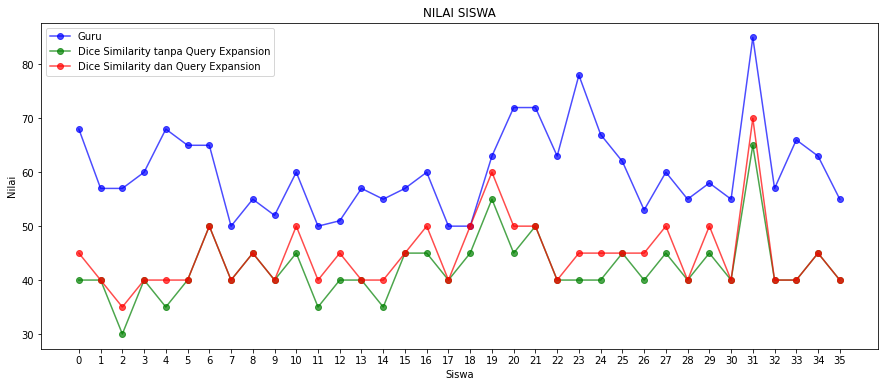

In [31]:
plt.figure(figsize=(15, 6))
plt.title("NILAI SISWA")
plt.plot(range(0,36), jawaban_siswa_df.loc[:,"NILAI"], alpha=0.7, marker="o", color="Blue", label="Guru")
plt.plot(range(0,36), jawaban_siswa_df.loc[:,"score"], alpha=0.7, marker="o", color="Green", label="Dice Similarity tanpa Query Expansion")
plt.plot(range(0,36), dataNew2.loc[:,"hasil_siswa"], alpha=0.7, marker="o", color="Red", label="Dice Similarity dan Query Expansion")
plt.xlabel("Siswa")
plt.ylabel('Nilai')
plt.xticks(range(0,36), range(0,36))
plt.legend()
plt.show()

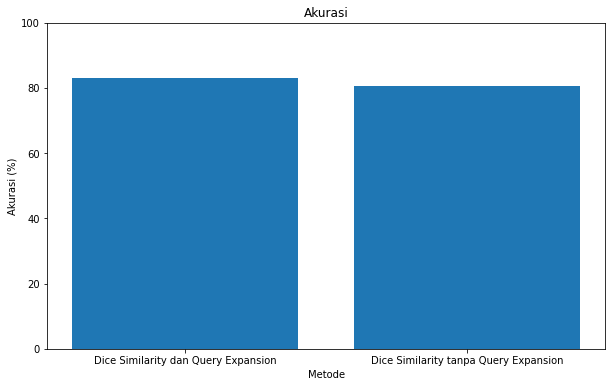

In [32]:
plt.figure(figsize=(10, 6))
# Data
labels = ['Dice Similarity dan Query Expansion', 'Dice Similarity tanpa Query Expansion']
accuracies = [percent2, percent]

# Plot
plt.bar(labels, accuracies)
plt.title('Akurasi')
plt.xlabel('Metode')
plt.ylabel('Akurasi (%)')
plt.ylim(0, 100)  # Set the y-axis limits from 0 to 100
plt.xticks(labels, labels, ha='center')
plt.show()


In [33]:
#dataNew.to_excel('dataExp.xlsx', index=False)